# Battle of Toronto Neighborhoods - Capstone Project

## Initial Data Scraping

In [1]:
#Importing Pandas for data cleaning
import pandas as pd
import numpy as np

In [140]:
#Importing the data from the downloaded csv file
df1 = pd.read_csv('Neighbourhoods.csv')
neighdata = df1[['AREA_NAME','LATITUDE','LONGITUDE']]
neighdata.head()

,AREA_NAME,LATITUDE,LONGITUDE
0,Wychwood,43.676919,-79.425515
1,Yonge-Eglinton,43.704689,-79.403590
2,Yonge-St.Clair,43.687859,-79.397871
3,York University Heights,43.765736,-79.488883
4,Yorkdale-Glen Park,43.714672,-79.457108


In [6]:
from geopy.geocoders import Nominatim
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [10]:
import folium
# create map of New York using latitude and longitude values
map_totonto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighdata['LATITUDE'], neighdata['LONGITUDE'], neighdata['AREA_NAME']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_totonto)  
    
map_totonto

### Obtaining the venues data from Foursquare 

In [11]:
CLIENT_ID = 'UF34A12MOICJUZKMRFTTEBYTYBEU0I1QX0IAVKP2NSD5LKC3' # your Foursquare ID
CLIENT_SECRET = 'DQLGEK1UA5CDKWKUX2ZH2X5A234V0HUP4OY1VVPV2OGCXD5G' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UF34A12MOICJUZKMRFTTEBYTYBEU0I1QX0IAVKP2NSD5LKC3
CLIENT_SECRET:DQLGEK1UA5CDKWKUX2ZH2X5A234V0HUP4OY1VVPV2OGCXD5G


In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
import json
import requests
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
toronto_venues = getNearbyVenues(names=neighdata['AREA_NAME'],
                                   latitudes=neighdata['LATITUDE'],
                                   longitudes=neighdata['LONGITUDE']
                                  )

Wychwood 
Yonge-Eglinton 
Yonge-St.Clair 
York University Heights 
Yorkdale-Glen Park 
Lambton Baby Point 
Lansing-Westgate 
Lawrence Park North 
Lawrence Park South 
Leaside-Bennington 
Little Portugal 
Long Branch 
Malvern 
Maple Leaf 
Markland Wood 
Milliken 
Mimico 
Morningside 
Moss Park 
Mount Dennis 
Mount Olive-Silverstone-Jamestown 
Mount Pleasant East 
Mount Pleasant West 
New Toronto 
Newtonbrook East 
Newtonbrook West 
Niagara 
North Riverdale 
North St.James Town 
O'Connor-Parkview 
Oakridge 
Oakwood Village 
Old East York 
Palmerston-Little Italy 
Parkwoods-Donalda 
Pelmo Park-Humberlea 
Playter Estates-Danforth 
Pleasant View 
Princess-Rosethorn 
Regent Park 
Rexdale-Kipling 
Rockcliffe-Smythe 
Roncesvalles 
Rosedale-Moore Park 
Rouge 
Runnymede-Bloor West Village 
Rustic 
Scarborough Village 
South Parkdale 
South Riverdale 
St.Andrew-Windfields 
Steeles 
Stonegate-Queensway 
Tam O'Shanter-Sullivan 
Taylor-Massey 
The Beaches 
Thistletown-Beaumond Heights 
Thorncliffe P

In [16]:
print(toronto_venues.shape)
toronto_venues.head()

(2048, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wychwood,43.676919,-79.425515,Wychwood Barns,43.680028,-79.423810,Event Space
1,Wychwood,43.676919,-79.425515,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market
2,Wychwood,43.676919,-79.425515,Hillcrest Park,43.676012,-79.424787,Park
3,Wychwood,43.676919,-79.425515,Wychwood Barns Community Gallery,43.679386,-79.424254,Art Gallery
4,Yonge-Eglinton,43.704689,-79.403590,North Toronto Memorial Community Centre,43.706098,-79.404337,Gym


In [18]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt North,18,18,18,18,18,18
Agincourt South-Malvern West,20,20,20,20,20,20
Alderwood,5,5,5,5,5,5
Annex,26,26,26,26,26,26
Banbury-Don Mills,25,25,25,25,25,25
...,...,...,...,...,...,...
Wychwood,4,4,4,4,4,4
Yonge-Eglinton,39,39,39,39,39,39
Yonge-St.Clair,53,53,53,53,53,53


In [19]:
print('There are {} unique venues in Toronto.'.format(len(toronto_venues['Venue Category'].unique())))

There are 281 unique venues in Toronto.


### Processing the venues information for the neighborhoods

In [20]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
print(toronto_onehot.shape)
toronto_onehot.head()

(2048, 281)


,Zoo Exhibit,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Grouping the data as per the venues in each neighborhood 
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
print(toronto_grouped.shape)
toronto_grouped

(138, 281)


,Neighborhood,Zoo Exhibit,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Agincourt North,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000,0.0
1,Agincourt South-Malvern West,0.0,0.0,0.050000,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,Alderwood,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,Annex,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,Banbury-Don Mills,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Wychwood,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.25,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
134,Yonge-Eglinton,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
135,Yonge-St.Clair,0.0,0.0,0.018868,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.018868,0.0,0.0,0.0,0.000000,0.0,0.018868,0.0
136,York University Heights,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
# Finding the 10 most common venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Pizza Place,Discount Store,Fast Food Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Liquor Store,Sandwich Place,Beer Store,Chinese Restaurant,Bakery
1,Agincourt South-Malvern West,Chinese Restaurant,Mediterranean Restaurant,Bank,Pool Hall,Restaurant,Noodle House,Cantonese Restaurant,Seafood Restaurant,Shopping Mall,Motorcycle Shop
2,Alderwood,Pizza Place,Convenience Store,Pharmacy,Coffee Shop,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
3,Annex,Sandwich Place,Café,Pub,Pharmacy,BBQ Joint,Social Club,Burger Joint,Pet Store,French Restaurant,Liquor Store
4,Banbury-Don Mills,Shoe Store,Pizza Place,Gourmet Shop,Coffee Shop,Movie Theater,Furniture / Home Store,Liquor Store,Sandwich Place,Cantonese Restaurant,Cosmetics Shop


### Applying K-means clustering to the venues data for Toronto neighborhoods using 4 clusters

In [38]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([2, 2, 2, 0, 0, 1, 0, 0, 1, 0])

In [40]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [61]:
#neighdata.rename(columns={'Neighborhood':'AREA_NAME'})

,AREA_NAME,LATITUDE,LONGITUDE
0,Wychwood,43.676919,-79.425515
1,Yonge-Eglinton,43.704689,-79.403590
2,Yonge-St.Clair,43.687859,-79.397871
3,York University Heights,43.765736,-79.488883
4,Yorkdale-Glen Park,43.714672,-79.457108
...,...,...,...
135,Kennedy Park,43.725556,-79.260382
136,Kensington-Chinatown,43.653554,-79.397240
137,Kingsview Village-The Westway,43.698993,-79.547863
138,Kingsway South,43.653520,-79.510577


In [44]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Agincourt North,Pizza Place,Discount Store,Fast Food Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Liquor Store,Sandwich Place,Beer Store,Chinese Restaurant,Bakery
1,2,Agincourt South-Malvern West,Chinese Restaurant,Mediterranean Restaurant,Bank,Pool Hall,Restaurant,Noodle House,Cantonese Restaurant,Seafood Restaurant,Shopping Mall,Motorcycle Shop
2,2,Alderwood,Pizza Place,Convenience Store,Pharmacy,Coffee Shop,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
3,0,Annex,Sandwich Place,Café,Pub,Pharmacy,BBQ Joint,Social Club,Burger Joint,Pet Store,French Restaurant,Liquor Store
4,0,Banbury-Don Mills,Shoe Store,Pizza Place,Gourmet Shop,Coffee Shop,Movie Theater,Furniture / Home Store,Liquor Store,Sandwich Place,Cantonese Restaurant,Cosmetics Shop


In [62]:
#neighdata.dtypes
neighdata['AREA_NAME'].duplicated().any()
#neighdata['Neighborhood'] = neighdata['Neighborhood'].astype(str)

False

In [64]:
toronto_merged = pd.merge(neighborhoods_venues_sorted, neighdata, left_on='Neighborhood', right_on='AREA_NAME', how='outer',suffixes=('_left','_right'))
toronto_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,AREA_NAME,LATITUDE,LONGITUDE
0,2.0,Agincourt North,Pizza Place,Discount Store,Fast Food Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Liquor Store,Sandwich Place,Beer Store,Chinese Restaurant,Bakery,Agincourt North,43.805441,-79.266712
1,2.0,Agincourt South-Malvern West,Chinese Restaurant,Mediterranean Restaurant,Bank,Pool Hall,Restaurant,Noodle House,Cantonese Restaurant,Seafood Restaurant,Shopping Mall,Motorcycle Shop,Agincourt South-Malvern West,43.788658,-79.265612
2,2.0,Alderwood,Pizza Place,Convenience Store,Pharmacy,Coffee Shop,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Alderwood,43.604937,-79.541611
3,0.0,Annex,Sandwich Place,Café,Pub,Pharmacy,BBQ Joint,Social Club,Burger Joint,Pet Store,French Restaurant,Liquor Store,Annex,43.671585,-79.404001
4,0.0,Banbury-Don Mills,Shoe Store,Pizza Place,Gourmet Shop,Coffee Shop,Movie Theater,Furniture / Home Store,Liquor Store,Sandwich Place,Cantonese Restaurant,Cosmetics Shop,Banbury-Don Mills,43.737657,-79.349718


In [66]:
toronto_merged.shape

(140, 15)

In [69]:
toronto_merged.dtypes

Cluster Labels            float64
Neighborhood               object
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
AREA_NAME                  object
LATITUDE                  float64
LONGITUDE                 float64
dtype: object

In [71]:
toronto_merged.isnull().sum()

Cluster Labels            2
Neighborhood              2
1st Most Common Venue     2
2nd Most Common Venue     2
3rd Most Common Venue     2
4th Most Common Venue     2
5th Most Common Venue     2
6th Most Common Venue     2
7th Most Common Venue     2
8th Most Common Venue     2
9th Most Common Venue     2
10th Most Common Venue    2
AREA_NAME                 0
LATITUDE                  0
LONGITUDE                 0
dtype: int64

In [80]:
#toronto_merged[~toronto_merged.isin([np.nan, np.inf, -np.inf]).any(1)]
#toronto_merged[~toronto_merged.isin([np.nan, np.inf, -np.inf]).sum()]
toronto_merged = toronto_merged.replace([np.inf, -np.inf], np.nan)

In [81]:
toronto_merged = toronto_merged.dropna()

In [82]:
toronto_merged.shape

(138, 15)

In [83]:
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

In [353]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['LATITUDE'], toronto_merged['LONGITUDE'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)
       
map_clusters1

# Segmenting Neighborhoods based on the 5 year crime data 

In [86]:
crimedata = pd.read_csv('Neighbourhood_Crime_Rates_Boundary_File_.csv')
crimedata.shape

(140, 60)

In [87]:
colnames = list(crimedata.columns.values)
print(colnames)

['OBJECTID', 'Neighbourhood', 'Hood_ID', 'Population', 'Assault_2014', 'Assault_2015', 'Assault_2016', 'Assault_2017', 'Assault_2018', 'Assault_2019', 'Assault_AVG', 'Assault_CHG', 'Assault_Rate_2019', 'AutoTheft_2014', 'AutoTheft_2015', 'AutoTheft_2016', 'AutoTheft_2017', 'AutoTheft_2018', 'AutoTheft_2019', 'AutoTheft_AVG', 'AutoTheft_CHG', 'AutoTheft_Rate_2019', 'BreakandEnter_2014', 'BreakandEnter_2015', 'BreakandEnter_2016', 'BreakandEnter_2017', 'BreakandEnter_2018', 'BreakandEnter_2019', 'BreakandEnter_AVG', 'BreakandEnter_CHG', 'BreakandEnter_Rate_2019', 'Homicide_2014', 'Homicide_2015', 'Homicide_2016', 'Homicide_2017', 'Homicide_2018', 'Homicide_2019', 'Homicide_AVG', 'Homicide_CHG', 'Homicide_Rate_2019', 'Robbery_2014', 'Robbery_2015', 'Robbery_2016', 'Robbery_2017', 'Robbery_2018', 'Robbery_2019', 'Robbery_AVG', 'Robbery_CHG', 'Robbery_Rate_2019', 'TheftOver_2014', 'TheftOver_2015', 'TheftOver_2016', 'TheftOver_2017', 'TheftOver_2018', 'TheftOver_2019', 'TheftOver_AVG', 'The

In [88]:
popdata = pd.read_csv('wellbeing_toronto_ds1.csv')

In [89]:
popdata.shape

(140, 22)

In [90]:
colnames_pop = list(popdata.columns.values)
print(colnames_pop)

['Neighbourhood', 'Neighbourhood Id', 'Combined Indicators', 'Total Population', 'Healthy Food Index', 'Early Development Instrument (EDI)', 'Recent Immigrants', 'Average Family Income', 'Tenant Average Rent', 'Rented Dwellings', 'Owned Dwellings', '   Chinese', '   Black', '   Japanese', '   Korean', '   West Asian', '   Arab', '   Southeast Asian', '   Latin American', '   Filipino', '   South Asian', 'Total Area']


In [223]:
crimedata_selected = crimedata[['Neighbourhood','Assault_AVG','AutoTheft_AVG','BreakandEnter_AVG', 'Homicide_AVG','Robbery_AVG']]
crimedata_selected.head()

,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG
0,Yonge-St.Clair,31.0,4.3,23.3,0.0,5.7
1,York University Heights,333.2,106.3,113.2,0.8,75.8
2,Lansing-Westgate,70.7,23.7,38.8,1.7,14.7
3,Yorkdale-Glen Park,160.2,55.5,63.3,1.2,31.5
4,Stonegate-Queensway,83.2,28.7,52.8,0.0,20.7


In [92]:
crimeX = crimedata[['Assault_AVG','AutoTheft_AVG','BreakandEnter_AVG', 'Homicide_AVG','Robbery_AVG']]
crimeX.head()

,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG
0,31.0,4.3,23.3,0.0,5.7
1,333.2,106.3,113.2,0.8,75.8
2,70.7,23.7,38.8,1.7,14.7
3,160.2,55.5,63.3,1.2,31.5
4,83.2,28.7,52.8,0.0,20.7


In [93]:
from sklearn.preprocessing import StandardScaler
crimeXnorm = crimeX.values[:,1:]
Clust_crimeXnorm = StandardScaler().fit_transform(crimeXnorm)

In [94]:
nclusters = 4
k_means_crime = KMeans(n_clusters = nclusters, random_state=0).fit(Clust_crimeXnorm)
labels = k_means_crime.labels_

In [224]:
crimedata_selected.insert(0, 'Labels_Crime', k_means_crime.labels_)
crimedata_selected.head()

,Labels_Crime,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG
0,3,Yonge-St.Clair,31.0,4.3,23.3,0.0,5.7
1,0,York University Heights,333.2,106.3,113.2,0.8,75.8
2,0,Lansing-Westgate,70.7,23.7,38.8,1.7,14.7
3,0,Yorkdale-Glen Park,160.2,55.5,63.3,1.2,31.5
4,3,Stonegate-Queensway,83.2,28.7,52.8,0.0,20.7


In [225]:
crimedata_selected['Neighbourhood'].duplicated().any()

False

In [114]:
neighdata.dtypes

AREA_NAME     object
LATITUDE     float64
LONGITUDE    float64
dtype: object

In [150]:
neighdata['AREA_NAME'].astype('str')
neighdata.dtypes

AREA_NAME     object
LATITUDE     float64
LONGITUDE    float64
dtype: object


In [157]:
#crime_merged = pd.merge_asof(crimedata_selected, neighdata, left_on='Neighbourhood', right_on='AREA_NAME')
#crime_merged.head()

In [227]:
#crimedata_selected.rename(columns={'Neighbourhood':'AREA_NAME'}, inplace=True)
#crimedata_selected.head()

In [228]:
crimedata_selected.dtypes

Labels_Crime           int32
Neighbourhood         object
Assault_AVG          float64
AutoTheft_AVG        float64
BreakandEnter_AVG    float64
Homicide_AVG         float64
Robbery_AVG          float64
dtype: object

In [165]:
#dtype = dict(AREA_NAME=str)
#crime_merged = crimedata_selected.astype(dtype).merge(neighdata.astype(dtype), 'left', on='AREA_NAME')

In [229]:
#crimedata_selected.drop('index', axis=1)

In [230]:
#crimedata_selected.reset_index(drop=True, inplace=True)

In [231]:
#crimedata_selected.drop(['index'], axis=1)

In [232]:
#crimedata_selected.rename(columns={'AREA_NAME':'Neighborhood'}, inplace=True)

In [233]:
#crimedata_selected.drop('index', axis=1)
#crimedata_selected.reset_index(drop=True, inplace=True)
#crimedata_selected.head()

In [236]:
#cr = crimedata_selected.join(neighdata.set_index('AREA_NAME'), on='AREA_NAME', how='outer')
cr = pd.merge(crimedata_selected, neighdata, left_on='Neighbourhood', right_on='AREA_NAME', how='outer')
cr.head()

,Labels_Crime,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,AREA_NAME,LATITUDE,LONGITUDE
0,3.0,Yonge-St.Clair,31.0,4.3,23.3,0.0,5.7,NaN,NaN,NaN
1,0.0,York University Heights,333.2,106.3,113.2,0.8,75.8,NaN,NaN,NaN
2,0.0,Lansing-Westgate,70.7,23.7,38.8,1.7,14.7,NaN,NaN,NaN
3,0.0,Yorkdale-Glen Park,160.2,55.5,63.3,1.2,31.5,NaN,NaN,NaN
4,3.0,Stonegate-Queensway,83.2,28.7,52.8,0.0,20.7,NaN,NaN,NaN


In [212]:
neighdata.head()

,AREA_NAME,LATITUDE,LONGITUDE
0,Wychwood,43.676919,-79.425515
1,Yonge-Eglinton,43.704689,-79.403590
2,Yonge-St.Clair,43.687859,-79.397871
3,York University Heights,43.765736,-79.488883
4,Yorkdale-Glen Park,43.714672,-79.457108


In [234]:
#crimedata_selected.set_index('Neighbourhood').join(neighdata.set_index('AREA_NAME'))

,Labels_Crime,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,LATITUDE,LONGITUDE
Neighbourhood,,,,,,,,
Yonge-St.Clair,3,31.0,4.3,23.3,0.0,5.7,NaN,NaN
York University Heights,0,333.2,106.3,113.2,0.8,75.8,NaN,NaN
Lansing-Westgate,0,70.7,23.7,38.8,1.7,14.7,NaN,NaN
Yorkdale-Glen Park,0,160.2,55.5,63.3,1.2,31.5,NaN,NaN
Stonegate-Queensway,3,83.2,28.7,52.8,0.0,20.7,NaN,NaN
...,...,...,...,...,...,...,...,...
Milliken,0,83.8,58.5,108.3,0.2,32.7,NaN,NaN
Pleasant View,3,46.0,13.5,19.8,0.2,11.8,NaN,NaN
Wychwood,3,70.2,13.2,34.0,0.3,13.8,NaN,NaN


In [245]:
cd_sorted = crimedata_selected.sort_values('Neighbourhood')
cd_sorted.reset_index(drop=True, inplace=True)
cd_sorted.head()

,Labels_Crime,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG
0,3,Agincourt North,74.8,29.7,53.5,0.2,30.2
1,3,Agincourt South-Malvern West,117.8,36.7,79.8,0.2,27.3
2,3,Alderwood,36.3,16.2,24.7,0.2,6.8
3,0,Annex,246.3,22.0,147.5,0.5,40.8
4,3,Banbury-Don Mills,80.5,21.8,73.2,0.0,15.0


In [246]:
neighdata_sorted = neighdata.sort_values('AREA_NAME')
neighdata_sorted.reset_index(drop=True, inplace=True)
neighdata_sorted.head()

,AREA_NAME,LATITUDE,LONGITUDE
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


In [252]:
cr = pd.concat([cd_sorted, neighdata_sorted], axis=1, join='inner')
cr.head()

,Labels_Crime,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,AREA_NAME,LATITUDE,LONGITUDE
0,3,Agincourt North,74.8,29.7,53.5,0.2,30.2,Agincourt North,43.805441,-79.266712
1,3,Agincourt South-Malvern West,117.8,36.7,79.8,0.2,27.3,Agincourt South-Malvern West,43.788658,-79.265612
2,3,Alderwood,36.3,16.2,24.7,0.2,6.8,Alderwood,43.604937,-79.541611
3,0,Annex,246.3,22.0,147.5,0.5,40.8,Annex,43.671585,-79.404001
4,3,Banbury-Don Mills,80.5,21.8,73.2,0.0,15.0,Banbury-Don Mills,43.737657,-79.349718


In [253]:
cr.dtypes

Labels_Crime           int32
Neighbourhood         object
Assault_AVG          float64
AutoTheft_AVG        float64
BreakandEnter_AVG    float64
Homicide_AVG         float64
Robbery_AVG          float64
AREA_NAME             object
LATITUDE             float64
LONGITUDE            float64
dtype: object

In [352]:
# create map
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cr['LATITUDE'], cr['LONGITUDE'], cr['Neighbourhood'], cr['Labels_Crime']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

# Segmenting neighborhoods based on multiple demographic parameters

In [256]:
demographdata = pd.read_csv('wellbeing_toronto_ds1.csv')
demographdata.shape

(140, 22)

In [257]:
democols = list(demographdata.columns.values)
print(democols)

['Neighbourhood', 'Neighbourhood Id', 'Combined Indicators', 'Total Population', 'Healthy Food Index', 'Early Development Instrument (EDI)', 'Recent Immigrants', 'Average Family Income', 'Tenant Average Rent', 'Rented Dwellings', 'Owned Dwellings', '   Chinese', '   Black', '   Japanese', '   Korean', '   West Asian', '   Arab', '   Southeast Asian', '   Latin American', '   Filipino', '   South Asian', 'Total Area']


In [260]:
dmgrdata_selected = demographdata[['Neighbourhood', 'Total Population', 'Healthy Food Index', 'Early Development Instrument (EDI)', 'Recent Immigrants', 'Average Family Income', 'Tenant Average Rent', 'Rented Dwellings', 'Owned Dwellings']]
dmgrdata_selected.head()

,Neighbourhood,Total Population,Healthy Food Index,Early Development Instrument (EDI),Recent Immigrants,Average Family Income,Tenant Average Rent,Rented Dwellings,Owned Dwellings
0,West Humber-Clairville,33312.0,23.82,15.339233,2440.0,72820.0,945.0,3050.0,7075.0
1,Mount Olive-Silverstone-Jamestown,32954.0,37.57,19.534884,4720.0,57411.0,921.0,5070.0,4540.0
2,Thistletown-Beaumond Heights,10360.0,42.26,16.037736,720.0,70838.0,887.0,1145.0,2080.0
3,Rexdale-Kipling,10529.0,23.31,7.894737,625.0,69367.0,857.0,1935.0,2010.0
4,Elms-Old Rexdale,9456.0,24.71,9.782609,530.0,61196.0,966.0,1315.0,1910.0


In [261]:
dmgrX = demographdata[['Total Population', 'Healthy Food Index', 'Early Development Instrument (EDI)', 'Recent Immigrants', 'Average Family Income', 'Tenant Average Rent', 'Rented Dwellings', 'Owned Dwellings']]
dmgrX.head()

,Total Population,Healthy Food Index,Early Development Instrument (EDI),Recent Immigrants,Average Family Income,Tenant Average Rent,Rented Dwellings,Owned Dwellings
0,33312.0,23.82,15.339233,2440.0,72820.0,945.0,3050.0,7075.0
1,32954.0,37.57,19.534884,4720.0,57411.0,921.0,5070.0,4540.0
2,10360.0,42.26,16.037736,720.0,70838.0,887.0,1145.0,2080.0
3,10529.0,23.31,7.894737,625.0,69367.0,857.0,1935.0,2010.0
4,9456.0,24.71,9.782609,530.0,61196.0,966.0,1315.0,1910.0


In [263]:
dmgrXnorm = dmgrX.values[:,1:]
Clust_dmgrXnorm = StandardScaler().fit_transform(dmgrXnorm)

In [264]:
nclusters = 4
k_means_dmgr = KMeans(n_clusters = nclusters, random_state=0).fit(Clust_dmgrXnorm)
labels = k_means_dmgr.labels_

In [265]:
dmgrdata_selected.insert(0, 'Labels_Demograph', k_means_dmgr.labels_)
dmgrdata_selected.head()

,Labels_Demograph,Neighbourhood,Total Population,Healthy Food Index,Early Development Instrument (EDI),Recent Immigrants,Average Family Income,Tenant Average Rent,Rented Dwellings,Owned Dwellings
0,2,West Humber-Clairville,33312.0,23.82,15.339233,2440.0,72820.0,945.0,3050.0,7075.0
1,2,Mount Olive-Silverstone-Jamestown,32954.0,37.57,19.534884,4720.0,57411.0,921.0,5070.0,4540.0
2,3,Thistletown-Beaumond Heights,10360.0,42.26,16.037736,720.0,70838.0,887.0,1145.0,2080.0
3,0,Rexdale-Kipling,10529.0,23.31,7.894737,625.0,69367.0,857.0,1935.0,2010.0
4,0,Elms-Old Rexdale,9456.0,24.71,9.782609,530.0,61196.0,966.0,1315.0,1910.0


In [269]:
dmgrdata_selected.shape

(140, 10)

In [270]:
demo_sorted = dmgrdata_selected.sort_values('Neighbourhood')
demo_sorted.reset_index(drop=True, inplace=True)
demo_sorted.head()

,Labels_Demograph,Neighbourhood,Total Population,Healthy Food Index,Early Development Instrument (EDI),Recent Immigrants,Average Family Income,Tenant Average Rent,Rented Dwellings,Owned Dwellings
0,3,Agincourt North,29113.0,38.09,12.334802,2165.0,67622.0,976.0,1810.0,7335.0
1,3,Agincourt South-Malvern West,23757.0,35.26,17.821782,1735.0,68465.0,971.0,1635.0,5250.0
2,0,Alderwood,12054.0,11.41,12.612613,200.0,83584.0,984.0,1030.0,3635.0
3,1,Annex,30526.0,38.85,5.050505,975.0,141111.0,1237.0,9780.0,5770.0
4,2,Banbury-Don Mills,27695.0,21.31,8.974359,1500.0,115239.0,1213.0,4735.0,7035.0


In [271]:
dmgr_concat = pd.concat([demo_sorted, neighdata_sorted], axis=1, join='inner')
dmgr_concat.head()

,Labels_Demograph,Neighbourhood,Total Population,Healthy Food Index,Early Development Instrument (EDI),Recent Immigrants,Average Family Income,Tenant Average Rent,Rented Dwellings,Owned Dwellings,AREA_NAME,LATITUDE,LONGITUDE
0,3,Agincourt North,29113.0,38.09,12.334802,2165.0,67622.0,976.0,1810.0,7335.0,Agincourt North,43.805441,-79.266712
1,3,Agincourt South-Malvern West,23757.0,35.26,17.821782,1735.0,68465.0,971.0,1635.0,5250.0,Agincourt South-Malvern West,43.788658,-79.265612
2,0,Alderwood,12054.0,11.41,12.612613,200.0,83584.0,984.0,1030.0,3635.0,Alderwood,43.604937,-79.541611
3,1,Annex,30526.0,38.85,5.050505,975.0,141111.0,1237.0,9780.0,5770.0,Annex,43.671585,-79.404001
4,2,Banbury-Don Mills,27695.0,21.31,8.974359,1500.0,115239.0,1213.0,4735.0,7035.0,Banbury-Don Mills,43.737657,-79.349718


In [351]:
# create map
map_clusters3 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dmgr_concat['LATITUDE'], dmgr_concat['LONGITUDE'], dmgr_concat['Neighbourhood'], dmgr_concat['Labels_Demograph']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters3)
       
map_clusters3

In [274]:
venue_sorted = neighborhoods_venues_sorted.sort_values('Neighborhood')
venue_sorted.reset_index(drop=True, inplace=True)
venue_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Agincourt North,Pizza Place,Discount Store,Fast Food Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Liquor Store,Sandwich Place,Beer Store,Chinese Restaurant,Bakery
1,2,Agincourt South-Malvern West,Chinese Restaurant,Mediterranean Restaurant,Bank,Pool Hall,Restaurant,Noodle House,Cantonese Restaurant,Seafood Restaurant,Shopping Mall,Motorcycle Shop
2,2,Alderwood,Pizza Place,Convenience Store,Pharmacy,Coffee Shop,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
3,0,Annex,Sandwich Place,Café,Pub,Pharmacy,BBQ Joint,Social Club,Burger Joint,Pet Store,French Restaurant,Liquor Store
4,0,Banbury-Don Mills,Shoe Store,Pizza Place,Gourmet Shop,Coffee Shop,Movie Theater,Furniture / Home Store,Liquor Store,Sandwich Place,Cantonese Restaurant,Cosmetics Shop


# Analyzing neighborhoods based on crime data and other demographics including population, average rent, number of immigrants, etc.

In [292]:
data_concat = pd.concat([demo_sorted, cd_sorted, neighdata_sorted], axis=1, join='inner')
data_concat.head()

,Labels_Demograph,Neighbourhood,Total Population,Healthy Food Index,Early Development Instrument (EDI),Recent Immigrants,Average Family Income,Tenant Average Rent,Rented Dwellings,Owned Dwellings,Labels_Crime,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,AREA_NAME,LATITUDE,LONGITUDE
0,3,Agincourt North,29113.0,38.09,12.334802,2165.0,67622.0,976.0,1810.0,7335.0,3,Agincourt North,74.8,29.7,53.5,0.2,30.2,Agincourt North,43.805441,-79.266712
1,3,Agincourt South-Malvern West,23757.0,35.26,17.821782,1735.0,68465.0,971.0,1635.0,5250.0,3,Agincourt South-Malvern West,117.8,36.7,79.8,0.2,27.3,Agincourt South-Malvern West,43.788658,-79.265612
2,0,Alderwood,12054.0,11.41,12.612613,200.0,83584.0,984.0,1030.0,3635.0,3,Alderwood,36.3,16.2,24.7,0.2,6.8,Alderwood,43.604937,-79.541611
3,1,Annex,30526.0,38.85,5.050505,975.0,141111.0,1237.0,9780.0,5770.0,0,Annex,246.3,22.0,147.5,0.5,40.8,Annex,43.671585,-79.404001
4,2,Banbury-Don Mills,27695.0,21.31,8.974359,1500.0,115239.0,1213.0,4735.0,7035.0,3,Banbury-Don Mills,80.5,21.8,73.2,0.0,15.0,Banbury-Don Mills,43.737657,-79.349718


In [293]:
df2 = data_concat.drop(['Labels_Demograph','Neighbourhood','Labels_Crime'], axis=1)
df2.head()

,Total Population,Healthy Food Index,Early Development Instrument (EDI),Recent Immigrants,Average Family Income,Tenant Average Rent,Rented Dwellings,Owned Dwellings,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,AREA_NAME,LATITUDE,LONGITUDE
0,29113.0,38.09,12.334802,2165.0,67622.0,976.0,1810.0,7335.0,74.8,29.7,53.5,0.2,30.2,Agincourt North,43.805441,-79.266712
1,23757.0,35.26,17.821782,1735.0,68465.0,971.0,1635.0,5250.0,117.8,36.7,79.8,0.2,27.3,Agincourt South-Malvern West,43.788658,-79.265612
2,12054.0,11.41,12.612613,200.0,83584.0,984.0,1030.0,3635.0,36.3,16.2,24.7,0.2,6.8,Alderwood,43.604937,-79.541611
3,30526.0,38.85,5.050505,975.0,141111.0,1237.0,9780.0,5770.0,246.3,22.0,147.5,0.5,40.8,Annex,43.671585,-79.404001
4,27695.0,21.31,8.974359,1500.0,115239.0,1213.0,4735.0,7035.0,80.5,21.8,73.2,0.0,15.0,Banbury-Don Mills,43.737657,-79.349718


In [284]:
dcols = list(df2.columns.values)
print(dcols)

['Total Population', 'Healthy Food Index', 'Early Development Instrument (EDI)', 'Recent Immigrants', 'Average Family Income', 'Tenant Average Rent', 'Rented Dwellings', 'Owned Dwellings', 'Assault_AVG', 'AutoTheft_AVG', 'BreakandEnter_AVG', 'Homicide_AVG', 'Robbery_AVG', 'AREA_NAME', 'LATITUDE', 'LONGITUDE']


In [285]:
xdata = df2[['Total Population', 'Healthy Food Index', 'Early Development Instrument (EDI)', 'Recent Immigrants', 'Average Family Income', 'Tenant Average Rent', 'Rented Dwellings', 'Owned Dwellings', 'Assault_AVG', 'AutoTheft_AVG', 'BreakandEnter_AVG', 'Homicide_AVG', 'Robbery_AVG']]

In [286]:
xdatanorm = xdata.values[:,1:]
Clust_xdatanorm = StandardScaler().fit_transform(xdatanorm)

In [368]:
Clust_xdatanorm.shape

(140, 12)

In [288]:
nclusters = 4
k_means_dconcat = KMeans(n_clusters = nclusters, random_state=0).fit(Clust_xdatanorm)
labels = k_means_dconcat.labels_

In [294]:
df2.insert(0, 'Labels_Demograph', k_means_dconcat.labels_)
df2.head()

,Labels_Demograph,Total Population,Healthy Food Index,Early Development Instrument (EDI),Recent Immigrants,Average Family Income,Tenant Average Rent,Rented Dwellings,Owned Dwellings,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,AREA_NAME,LATITUDE,LONGITUDE
0,2,29113.0,38.09,12.334802,2165.0,67622.0,976.0,1810.0,7335.0,74.8,29.7,53.5,0.2,30.2,Agincourt North,43.805441,-79.266712
1,2,23757.0,35.26,17.821782,1735.0,68465.0,971.0,1635.0,5250.0,117.8,36.7,79.8,0.2,27.3,Agincourt South-Malvern West,43.788658,-79.265612
2,3,12054.0,11.41,12.612613,200.0,83584.0,984.0,1030.0,3635.0,36.3,16.2,24.7,0.2,6.8,Alderwood,43.604937,-79.541611
3,2,30526.0,38.85,5.050505,975.0,141111.0,1237.0,9780.0,5770.0,246.3,22.0,147.5,0.5,40.8,Annex,43.671585,-79.404001
4,1,27695.0,21.31,8.974359,1500.0,115239.0,1213.0,4735.0,7035.0,80.5,21.8,73.2,0.0,15.0,Banbury-Don Mills,43.737657,-79.349718


In [350]:
# create map
map_clusters4 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df2['LATITUDE'], df2['LONGITUDE'], df2['AREA_NAME'], df2['Labels_Demograph']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters4)
       
map_clusters4

# Analysis of neighbrohoods to find top 10 liveability areas

In [300]:
cols_df2 = list(df2.columns.values)
print(cols_df2)
#df2['Crime_Mean'] = cd_sorted.mean(axis=1) 

['Labels_Demograph', 'Total Population', 'Healthy Food Index', 'Early Development Instrument (EDI)', 'Recent Immigrants', 'Average Family Income', 'Tenant Average Rent', 'Rented Dwellings', 'Owned Dwellings', 'Assault_AVG', 'AutoTheft_AVG', 'BreakandEnter_AVG', 'Homicide_AVG', 'Robbery_AVG', 'AREA_NAME', 'LATITUDE', 'LONGITUDE', 'Crime_Mean']


In [302]:
df2['Crime_Mean'] = df2[['Assault_AVG', 'AutoTheft_AVG', 'BreakandEnter_AVG', 'Homicide_AVG', 'Robbery_AVG']].mean(axis=1) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [303]:
df2.head()

,Labels_Demograph,Total Population,Healthy Food Index,Early Development Instrument (EDI),Recent Immigrants,Average Family Income,Tenant Average Rent,Rented Dwellings,Owned Dwellings,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,AREA_NAME,LATITUDE,LONGITUDE,Crime_Mean
0,2,29113.0,38.09,12.334802,2165.0,67622.0,976.0,1810.0,7335.0,74.8,29.7,53.5,0.2,30.2,Agincourt North,43.805441,-79.266712,37.68
1,2,23757.0,35.26,17.821782,1735.0,68465.0,971.0,1635.0,5250.0,117.8,36.7,79.8,0.2,27.3,Agincourt South-Malvern West,43.788658,-79.265612,52.36
2,3,12054.0,11.41,12.612613,200.0,83584.0,984.0,1030.0,3635.0,36.3,16.2,24.7,0.2,6.8,Alderwood,43.604937,-79.541611,16.84
3,2,30526.0,38.85,5.050505,975.0,141111.0,1237.0,9780.0,5770.0,246.3,22.0,147.5,0.5,40.8,Annex,43.671585,-79.404001,91.42
4,1,27695.0,21.31,8.974359,1500.0,115239.0,1213.0,4735.0,7035.0,80.5,21.8,73.2,0.0,15.0,Banbury-Don Mills,43.737657,-79.349718,38.10


In [305]:
df2.sort_values(by='Crime_Mean', ascending=False, axis=0, inplace=True)
df2_top10_crime = df2['AREA_NAME'].head(10)
df2_top10_crime

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


122    Waterfront Communities-The Island 
6                    Bay Street Corridor 
23                 Church-Yonge Corridor 
124               West Humber-Clairville 
79                             Moss Park 
33                  Downsview-Roding-CFB 
138              York University Heights 
132                               Woburn 
62                  Kensington-Chinatown 
123                            West Hill 
Name: AREA_NAME, dtype: object

In [307]:
df2.sort_values(by='Total Population', ascending=False, axis=0, inplace=True)
df2_top10_pop = df2['AREA_NAME'].head(10)
df2_top10_pop

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


122      Waterfront Communities-The Island 
132                                 Woburn 
129                        Willowdale East 
105                                  Rouge 
65                              L'Amoreaux 
58              Islington-City Centre West 
73                                 Malvern 
32     Dovercourt-Wallace Emerson-Junction 
33                    Downsview-Roding-CFB 
95                       Parkwoods-Donalda 
Name: AREA_NAME, dtype: object

In [308]:
df2.sort_values(by='Recent Immigrants', ascending=False, axis=0, inplace=True)
df2_top10_imm = df2['AREA_NAME'].head(10)
df2_top10_imm

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


129                      Willowdale East 
132                               Woburn 
122    Waterfront Communities-The Island 
81     Mount Olive-Silverstone-Jamestown 
125                  Westminster-Branson 
65                            L'Amoreaux 
118                     Thorncliffe Park 
30                    Don Valley Village 
86                      Newtonbrook West 
33                  Downsview-Roding-CFB 
Name: AREA_NAME, dtype: object

In [322]:
df2.sort_values(by='Tenant Average Rent', ascending=False, axis=0, inplace=True)
df2_avgrent = df2[['AREA_NAME','Tenant Average Rent']].head(25)
df2_avgrent.set_index('AREA_NAME', drop=True, inplace=True)
df2_avgrent.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Tenant Average Rent
AREA_NAME,
Bridle Path-Sunnybrook-York Mills,2388.0
Kingsway South,1640.0
Casa Loma,1494.0
Rosedale-Moore Park,1468.0
Bay Street Corridor,1467.0


In [315]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


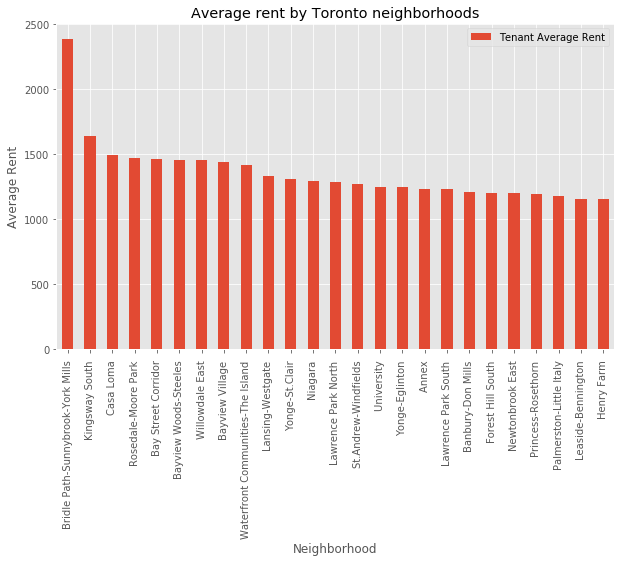

In [323]:
df2_avgrent.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Average Rent') # add y-label to the plot
plt.title('Average rent by Toronto neighborhoods') # add title to the plot

plt.show()

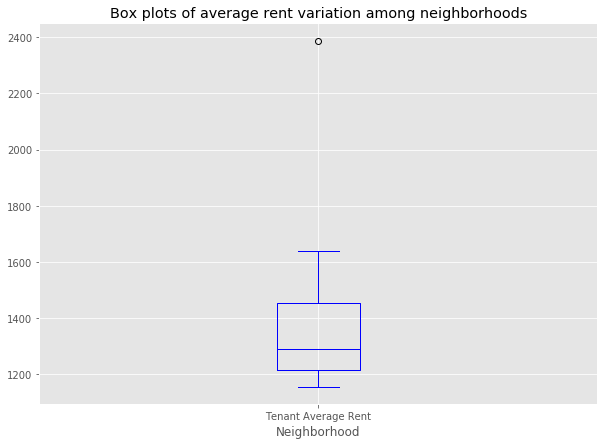

In [324]:
df2_avgrent.plot(kind='box', figsize=(10, 7), color='blue', vert=True)

plt.title('Box plots of average rent variation among neighborhoods')
plt.xlabel('Neighborhood')

plt.show()

In [328]:
df2.sort_values(by='Average Family Income', ascending=False, axis=0, inplace=True)
df2_dwel = df2[['AREA_NAME','Average Family Income','Rented Dwellings', 'Owned Dwellings']].head(25)
df2_dwel.set_index('AREA_NAME', drop=True, inplace=True)
df2_dwel.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Average Family Income,Rented Dwellings,Owned Dwellings
AREA_NAME,,,
Bridle Path-Sunnybrook-York Mills,356777.0,200.0,2805.0
Forest Hill South,251035.0,2160.0,2635.0
Rosedale-Moore Park,249884.0,4260.0,5740.0
Lawrence Park South,216754.0,1665.0,4010.0
Kingsway South,191204.0,535.0,2965.0


In [346]:
df2_ownedvsrent = df2_dwel[['Rented Dwellings', 'Owned Dwellings']].head(15)
#df2_ownedvsrent.set_index('AREA_NAME', drop=True, inplace=True)
df2_ownedvsrent.head()

,Rented Dwellings,Owned Dwellings
AREA_NAME,,
Bridle Path-Sunnybrook-York Mills,200.0,2805.0
Forest Hill South,2160.0,2635.0
Rosedale-Moore Park,4260.0,5740.0
Lawrence Park South,1665.0,4010.0
Kingsway South,535.0,2965.0


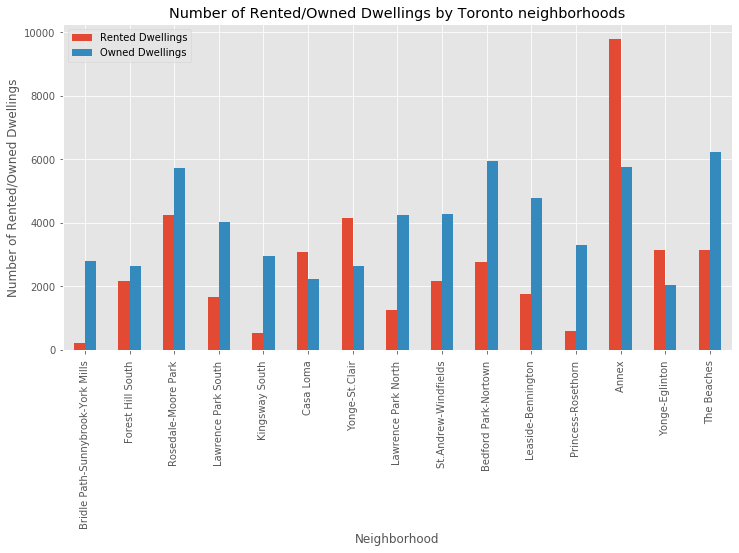

In [348]:
df2_ownedvsrent.plot.bar(figsize=(12, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Rented/Owned Dwellings') # add y-label to the plot
plt.title('Number of Rented/Owned Dwellings by Toronto neighborhoods') # add title to the plot

plt.show()

In [378]:
import branca.element as bre
f = bre.Figure()
f.add_subplot(2,2,1).add_child(map_clusters1)
f.add_subplot(2,2,2).add_child(map_clusters2)
f.add_subplot(2,2,3).add_child(map_clusters3)
f.add_subplot(2,2,4).add_child(map_clusters4)

## Conclusion

#### The data that has been used in the analysis is dense and can provide rich information about the neighborhoods based on customer choice and criteria. It is evident from the above clustering that some neighborhoods overlap in terms of attractive venues, lower crime rates, demographic indices. It is evident that the demographic parameters are driving the clustering in the above analysis. Also, the top 10 neighborhoods listed show that there is an overlap between different criteria and while one neighborhood may not have it all, an informed choice can be made based on data.